## Support Vector Machine

**Support Vector Machine (SVM)** is a supervised machine learning algorithm which can be used for both classification and regression. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features). Then, we perform classification by finding the hyper-plane that differentiate the classes very well.

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Support Vector Machine is an algorithm which defines the best hyper-plane to separate the points into different classes. Using these support vectors, we maximize the margin of the classifier.

**How to get the best hyper-plane?**  
The best hyper-plane is the one which has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

**Can SVM seperate non-linear data?**
Yes. The original problem may be stated in a finite-dimensional space, it often happens that the sets to discriminate are not linearly separable in that space. For this reason, it was proposed that the original finite-dimensional space be mapped into a much higher-dimensional space, presumably making the separation easier in that space. It's called kernel trick.


<br>
**How to find the best hyper-plane?**

> We are given a training dataset of n points of the form: $(\vec x_1, y_1), (\vec x_2, y_2), ...., (\vec x_n, y_n)$  
where, Each $\vec x_i$ is a p-dimensional real vector and $y_i$ are either 1 or −1, indicating the class to which the point $\vec x_i$ belongs.  We want to find the "maximum-margin hyperplane" that divides the group of points $\vec x_i$ for which $y_i = 1$ from the group of points for which $y_i = - 1$.

> Any hyperplane can be written as the set of points $\vec x$ satisfying:
$$\vec w \cdot \vec x - b = 0$$

> where $\vec w$ is the normal vector to the hyperplane.The parameter $b \over {\|w\|}$ determines the offset of the hyperplane from the origin along the normal vector $\vec w$.

> **Hard-margin**

> If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations:  
    $\vec w \cdot \vec x - b = 1$ (anything on or above this boundary is of one class, with label 1).  
and  
    $\vec w \cdot \vec x - b = -1$ (anything on or below this boundary is of the other class, with label −1).  

> Geometrically, the distance between these two hyperplanes is $2 \over {\|w\|}$, so to maximize the distance between the planes we want to minimize $\|w\|$. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint:  
for each i either:  
$\vec w \cdot \vec x_i - b \ge 1$, if $y_i = 1$,  
or  
$\vec w \cdot \vec x_i - b \le 1$, if $y_i = -1$.  
These constraints state that each data point must lie on the correct side of the margin.

> This can be rewritten as (for all $i$):
$$y_i(\vec w \cdot \vec x_i - b) \ge 1$$

> We can put this together to get the optimization problem:  
"Minimize $\|w\|$ subject to $y_i(\vec w \cdot \vec x_i - b ) \ge 1$ for $i = 1, 2, ..., n$."  
The $\vec w$ and $b$ that solve this problem determine our classifier.

> An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those $\vec x_i$ that lie nearest to it. These $\vec x_i$ are called support vectors.


> **Soft-margin**

> To extend SVM to cases in which the data are not linearly separable, we introduce the hinge loss function,
$$max(0, 1 - y_i(\vec w \cdot \vec x_i -b))$$
Note that $y_i$ is the i-th target output, and $(\vec w \cdot \vec x_i - b)$ is the current output.

> This function is zero if $\vec x_i$ lies on the correct side of the margin. For data on the wrong side of the margin, the function's value is proportional to the distance from the margin.

> We then wish to minimize:
$$\lbrack{ \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_i(\vec w \cdot \vec x_i -b))}\rbrack + \lambda \|w\|^2$$

> where the parameter $\lambda$ determines the trade-off between increasing the margin size and ensuring that the $\vec x_i$ lie on the correct side of the margin. Thus, for sufficiently small values of $\lambda$, the second term in the loss function will become negligible, hence, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not.

<br>
**Applications:**

> * SVMs are helpful in text and hypertext categorization.
* Classification of images.
* Hand-written characters can be recognized using SVM.

<br>
**Advantages:**

> * It works really well with clear margin of separation.
* It is effective in high dimensional spaces.
* It is effective in cases where number of dimensions is greater than the number of samples.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

<br>
**Disadvantages:**

> * It doesn’t perform well, when we have large data set because the required training time is higher.
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping.
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

## Use case implementation of Support Vector Machine

We will build a model to predict the type of iris flower (2 types - setosa and versicolor) when features - sepal length and petal length are given. 

Let's get started...


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
# label --> 0=setosa & 1=versicolor
data = pd.read_csv('iris.csv')

print(data.shape)

(100, 3)


In [3]:
data.head()
# label --> 0=setosa & 1=versicolor
# first 50 are of type setosa and next 50 are of type versicolor

,sepal length (cm),petal length (cm),label
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


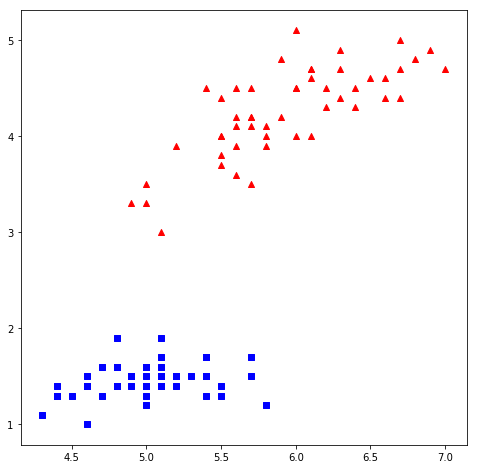

In [4]:
# plot the scatter-plot of data
setosa_x = data.iloc[:50]['sepal length (cm)']
setosa_y = data.iloc[:50]['petal length (cm)']
versicolor_x = data.iloc[50:]['sepal length (cm)']
versicolor_y = data.iloc[50:]['petal length (cm)']

plt.figure(figsize=(8,8))
plt.scatter(setosa_x, setosa_y, marker='s', color='blue')
plt.scatter(versicolor_x, versicolor_y, marker='^', color='red')
plt.show()

In [5]:
# split the data to train and test data
from sklearn.model_selection import train_test_split

x = data.iloc[:, :2]
y = data.iloc[:, 2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (80, 2)
x_test shape : (20, 2)
y_train shape : (80,)
y_test shape : (20,)


In [6]:
# create model and fit on training data
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        20

Confusion Matrix:



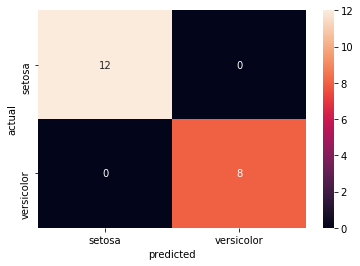

In [7]:
# evaluate the model using test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(x_test)

print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=['setosa', 'versicolor'],
                           columns=['setosa', 'versicolor'])
print('Confusion Matrix:\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

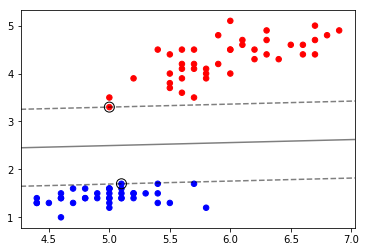

In [8]:
# plot the SVM graph showing decision boundaries

# scatter-plot of train data
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, s=30, cmap=plt.cm.bwr)

# get current axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()